<a href="https://colab.research.google.com/github/kerron3000/ml-heart-disease-prediction-public/blob/main/Heart_IQ_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Exploratory Data Analysis -> Heart Disease Dataset

import kagglehub

# Download latest version
path = kagglehub.dataset_download("neurocipher/heartdisease")

print("Path to dataset files:", path)

## Imports and Configuration

In [ ]:
!pip install pandas
!pip install numpy
!pip install matplotlib
!pip install seaborn
!pip install scikit-learn

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

##Load up the dataset

In [ ]:
df = pd.read_csv("Heart_Disease_Prediction.csv")

In [ ]:
df.head()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence


In [ ]:
print(f"Dataset Shape: {df.shape}")

Dataset Shape: (270, 14)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      270 non-null    int64  
 1   Sex                      270 non-null    int64  
 2   Chest pain type          270 non-null    int64  
 3   BP                       270 non-null    int64  
 4   Cholesterol              270 non-null    int64  
 5   FBS over 120             270 non-null    int64  
 6   EKG results              270 non-null    int64  
 7   Max HR                   270 non-null    int64  
 8   Exercise angina          270 non-null    int64  
 9   ST depression            270 non-null    float64
 10  Slope of ST              270 non-null    int64  
 11  Number of vessels fluro  270 non-null    int64  
 12  Thallium                 270 non-null    int64  
 13  Heart Disease            270 non-null    object 
dtypes: float64(1), int64(12), 

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,270.0,54.433333,9.109067,29.0,48.0,55.0,61.0,77.0
Sex,270.0,0.677778,0.468195,0.0,0.0,1.0,1.0,1.0
Chest pain type,270.0,3.174074,0.950090,1.0,3.0,3.0,4.0,4.0
BP,270.0,131.344444,17.861608,94.0,120.0,130.0,140.0,200.0
Cholesterol,270.0,249.659259,51.686237,126.0,213.0,245.0,280.0,564.0
FBS over 120,270.0,0.148148,0.355906,0.0,0.0,0.0,0.0,1.0
EKG results,270.0,1.022222,0.997891,0.0,0.0,2.0,2.0,2.0
Max HR,270.0,149.677778,23.165717,71.0,133.0,153.5,166.0,202.0
Exercise angina,270.0,0.329630,0.470952,0.0,0.0,0.0,1.0,1.0
ST depression,270.0,1.050000,1.145210,0.0,0.0,0.8,1.6,6.2


In [ ]:
#checking for missing values
missing = df.isnull().sum()
missing[missing > 0]

,0


In [ ]:
df["Heart Disease"].value_counts()

,count
Heart Disease,
Absence,150
Presence,120


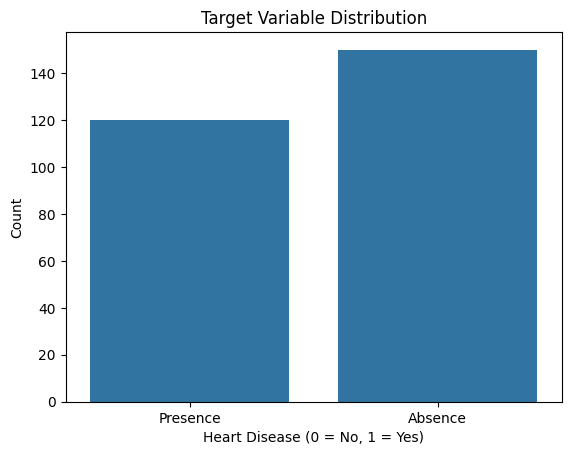

In [ ]:
sns.countplot(x="Heart Disease", data=df)
plt.title("Target Variable Distribution")
plt.xlabel("Heart Disease (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.show()


###Categorical Feature Analysis

In [ ]:
df_cat = pd.read_csv("Heart_Disease_Prediction.csv")

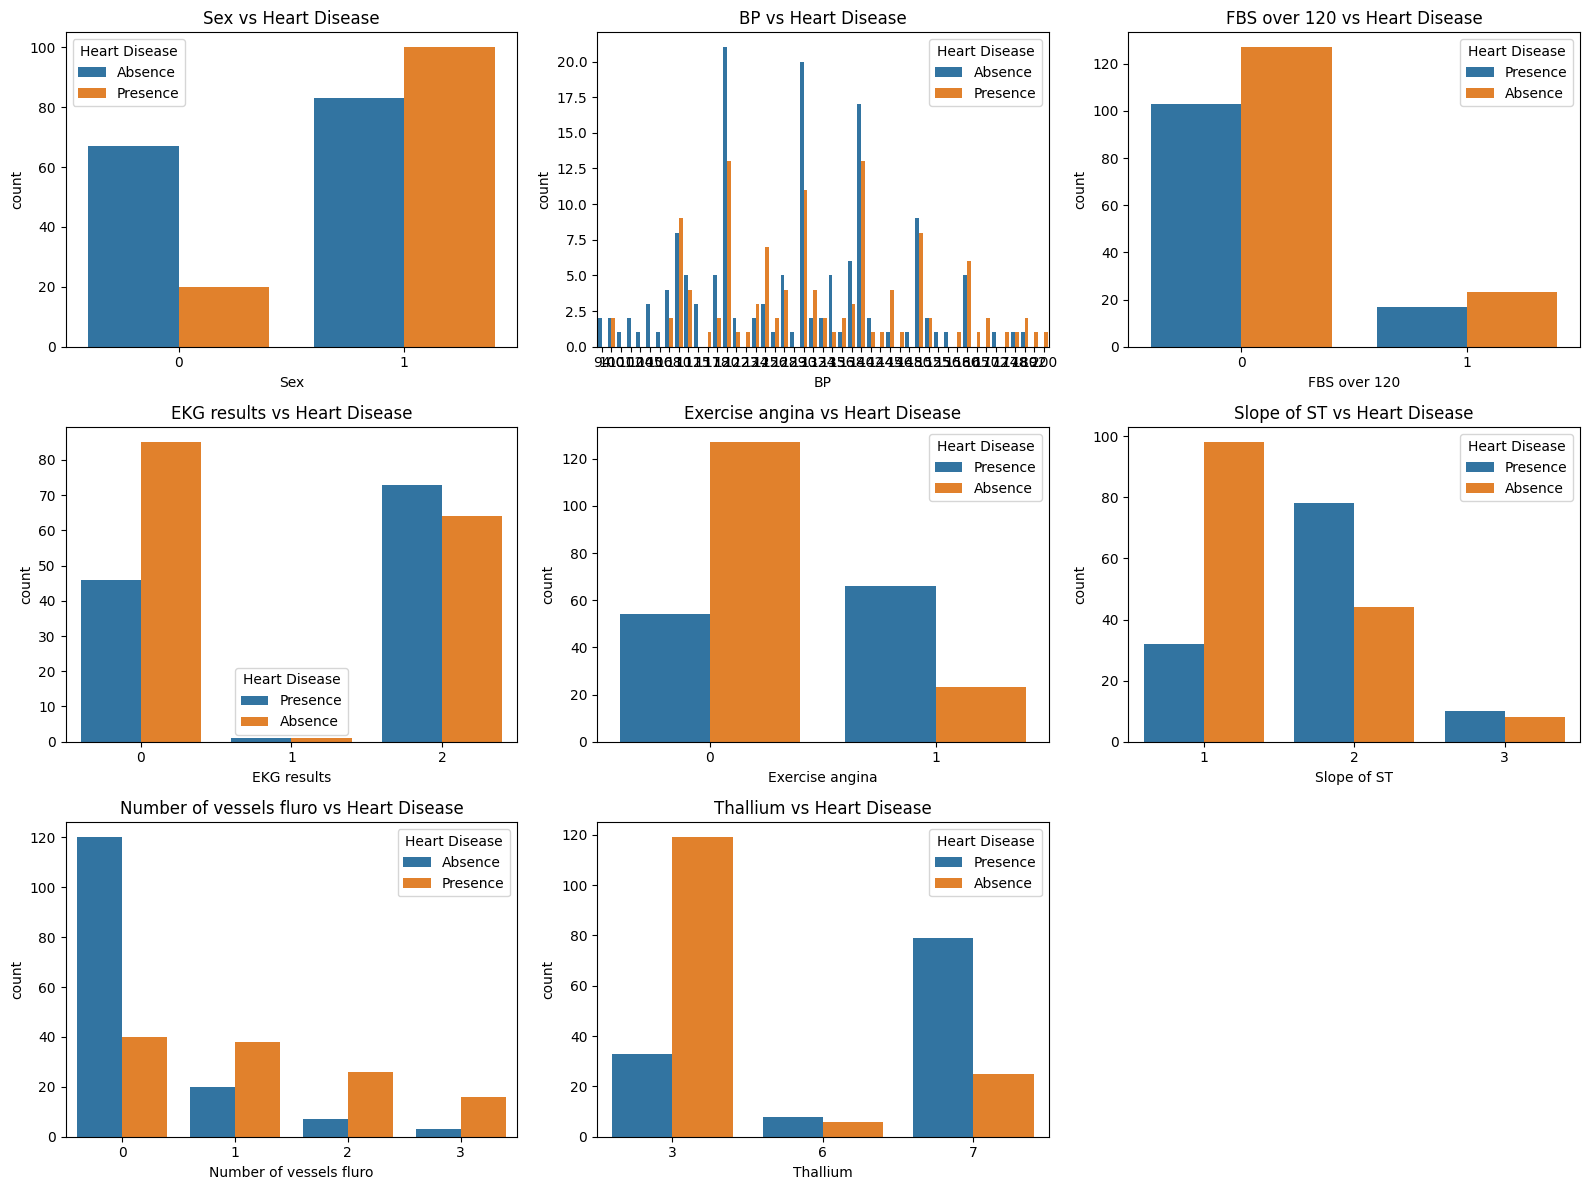

In [ ]:
categorical_features = [
    "Sex", "BP", "FBS over 120", "EKG results",
    "Exercise angina", "Slope of ST", "Number of vessels fluro", "Thallium"
]

plt.figure(figsize=(16, 12))

for i, col in enumerate(categorical_features, 1):
    plt.subplot(3, 3, i)
    sns.countplot(x=col, hue="Heart Disease", data=df_cat)
    plt.title(f"{col} vs Heart Disease")

plt.tight_layout()
plt.show()

###Numerical Feature Analysis

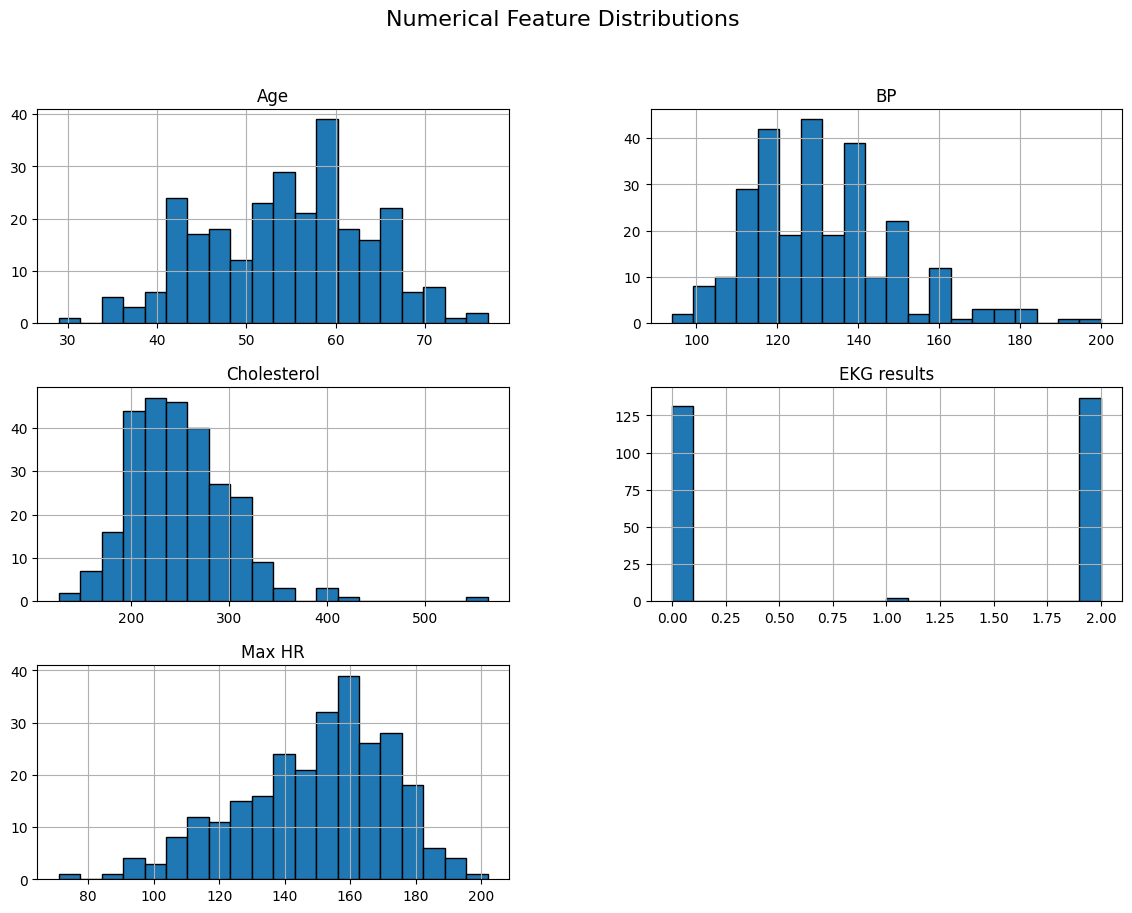

In [ ]:
numerical_features = [
    "Age", "BP", "Cholesterol",
    "EKG results", "Max HR"
]

df[numerical_features].hist(
    bins=20,
    figsize=(14, 10),
    edgecolor="black"
)

plt.suptitle("Numerical Feature Distributions", fontsize=16)
plt.show()

###Outlier detection

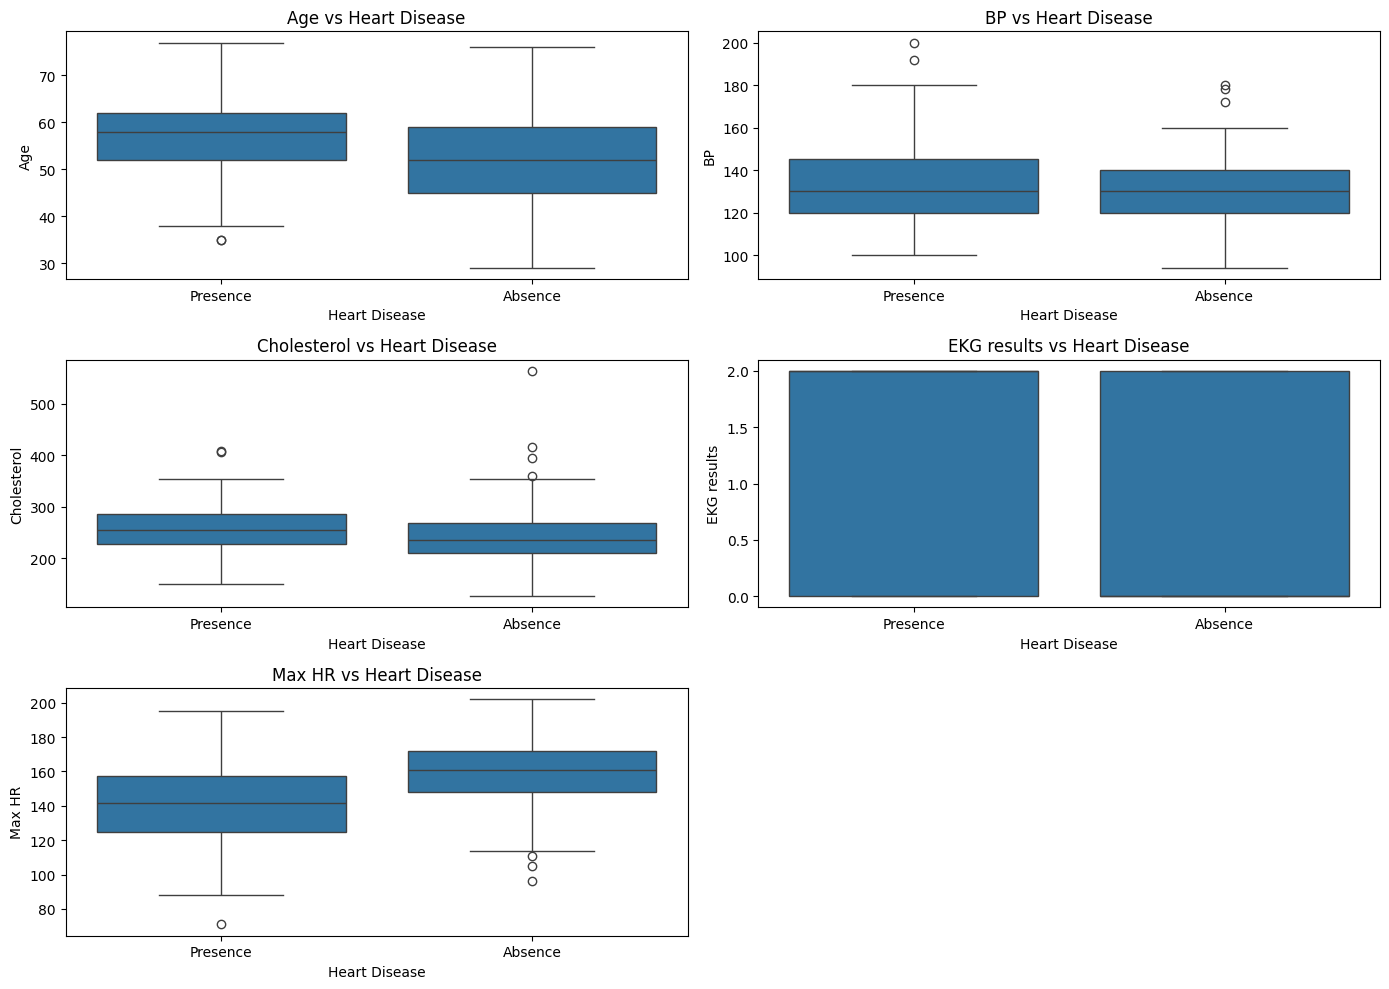

In [ ]:
plt.figure(figsize=(14, 10))

for i, col in enumerate(numerical_features, 1):
    plt.subplot(3, 2, i)
    sns.boxplot(x="Heart Disease", y=col, data=df)
    plt.title(f"{col} vs Heart Disease")

plt.tight_layout()
plt.show()

###Correlation Analysis

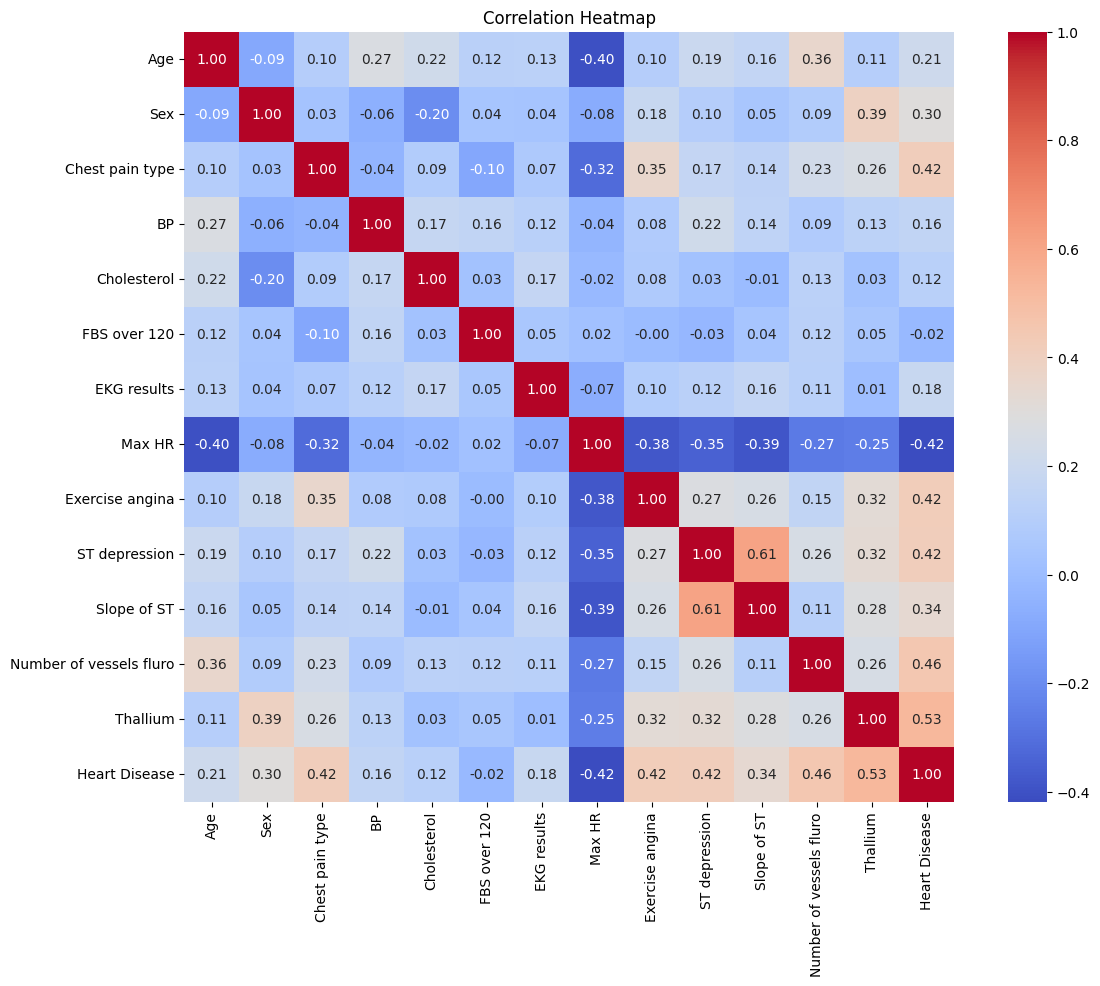

In [ ]:
df['Heart Disease'] = df['Heart Disease'].map({'Presence': 1, 'Absence': 0})
corr_matrix = df.corr()

plt.figure(figsize=(14, 10))
sns.heatmap(
    corr_matrix,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    square=True
)
plt.title("Correlation Heatmap")
plt.show()

###Features vs Targets

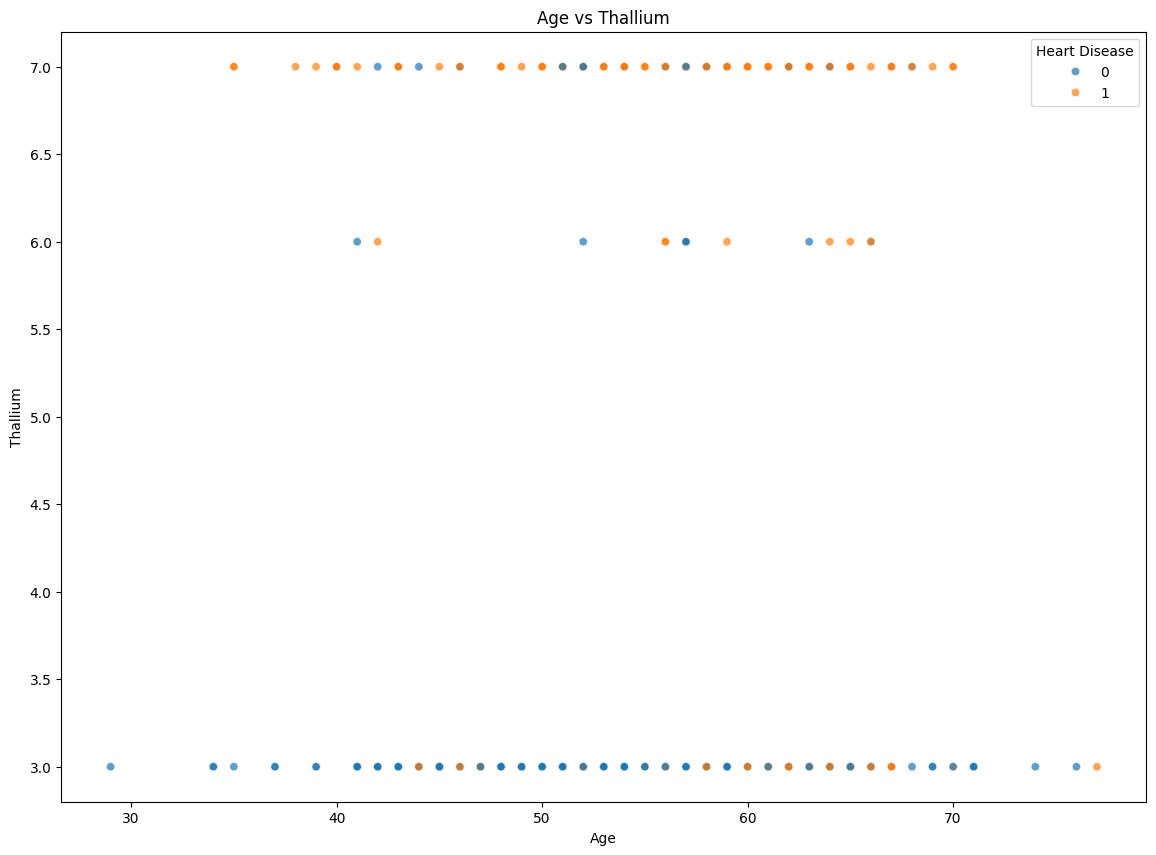

In [ ]:
plt.figure(figsize=(14, 10))

sns.scatterplot(
    x="Age",
    y="Thallium",
    hue="Heart Disease",
    data=df,
    alpha=0.7
)

plt.title("Age vs Thallium")
plt.show()

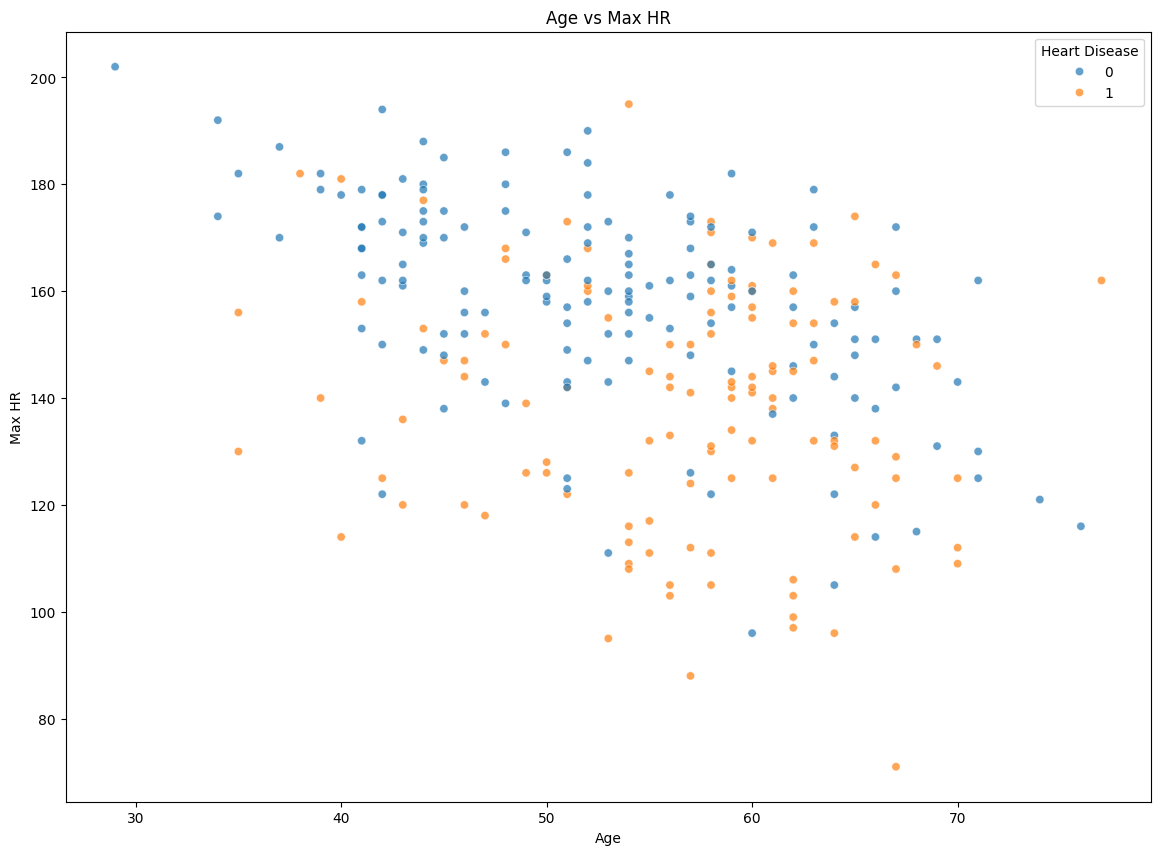

In [ ]:
plt.figure(figsize=(14, 10))

sns.scatterplot(
    x="Age",
    y="Max HR",
    hue="Heart Disease",
    data=df,
    alpha=0.7
)

plt.title("Age vs Max HR")
plt.show()

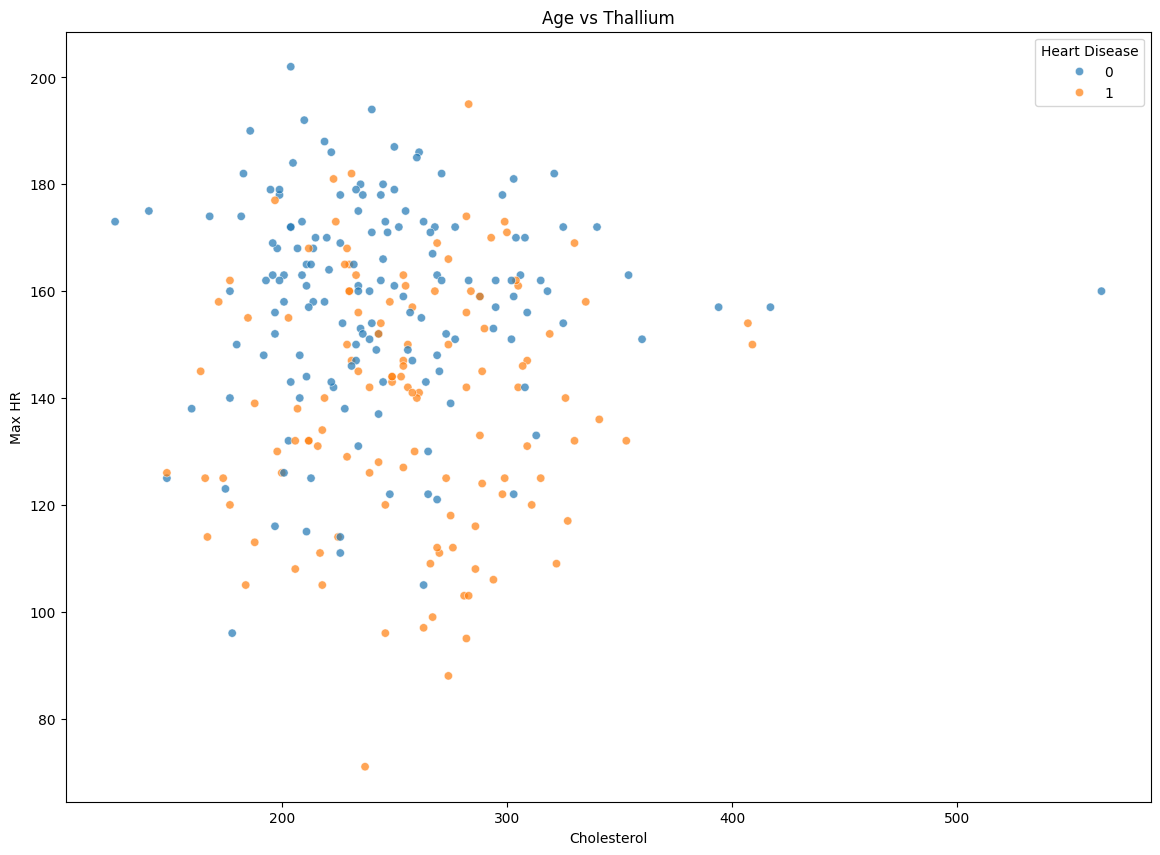

In [ ]:
plt.figure(figsize=(14, 10))

sns.scatterplot(
    x="Cholesterol",
    y="Max HR",
    hue="Heart Disease",
    data=df,
    alpha=0.7
)

plt.title("Age vs Thallium")
plt.show()